## Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Feature Transform (Basis Functions)

##### Load Data

In [2]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_data_path = f"{notebook_path}/data/data.csv"
csv_data_test_path = f"{notebook_path}/data/data_test.csv"

In [3]:
data = pd.read_csv(csv_data_path)
data.head()
x = data['x_data']
y = data['y_data']

#### Plot Data

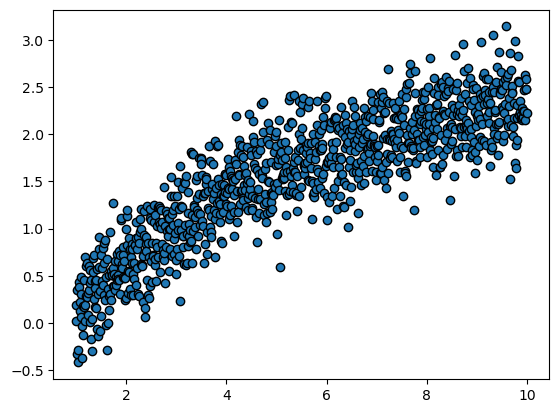

In [4]:
plt.scatter(x, y, ec='k');

#### Logaritm Transform & View Linearization

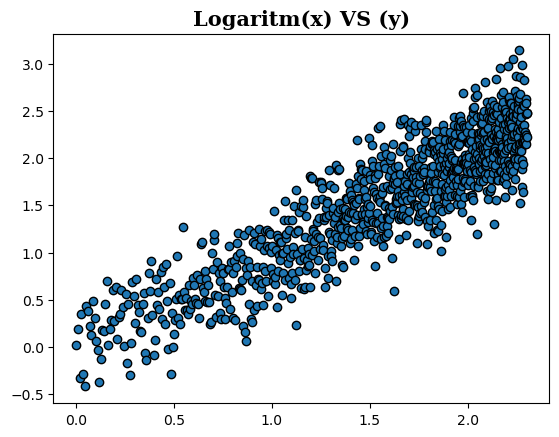

In [5]:
def logaritm_func(x):
    return np.log(x)

x_transformed = logaritm_func(x)
plt.scatter(x_transformed, y, ec='k')
plt.title('Logaritm(x) VS (y)', fontfamily='Serif', fontweight='bold', fontsize=15);

#### Distribution of x & y

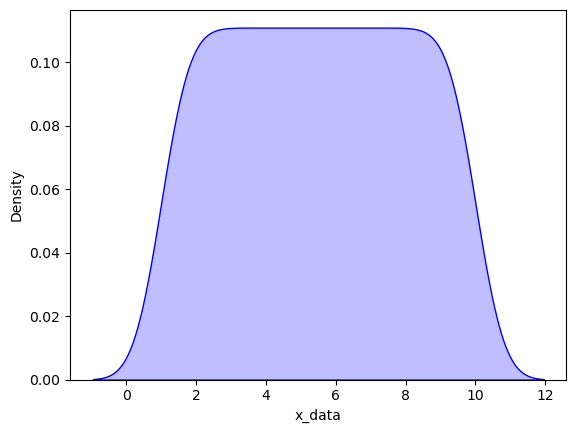

In [6]:
sns.kdeplot(x, fill=True, color='b');

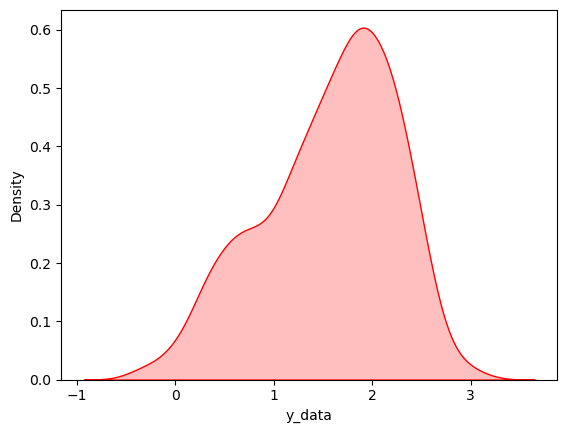

In [7]:
sns.kdeplot(y, fill=True, color='r');

#### Exponential Transform

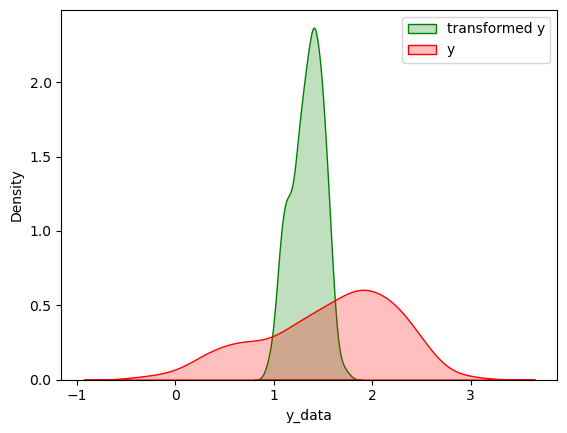

In [8]:
def transform_func(x):
    return 1.2**x

y_transformed = transform_func(y)

sns.kdeplot(y_transformed, fill=True, color='g', label='transformed y')
sns.kdeplot(y, fill=True, color='r', label='y')
plt.legend();

#### View Linearization

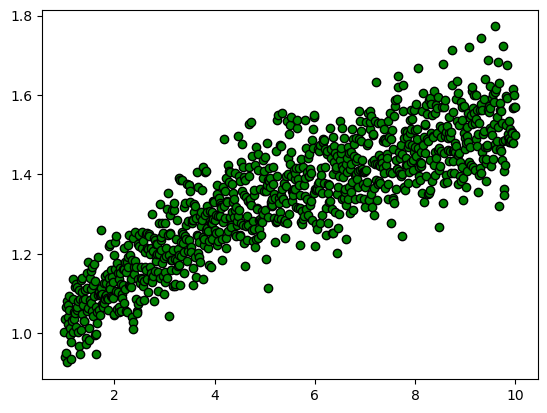

In [9]:
plt.scatter(x, y_transformed, color='g', ec='k');

#### Fit Model & Evaluate

In [10]:

# Read Test data
data_test = pd.read_csv(csv_data_test_path)
x_test = data_test['x_test_data']
y_test = data_test['y_test_data']

# Apply Transform
x_test_transformed = logaritm_func(x_test)

# Define, Fit & Validate Model
model1 = LinearRegression()
model1.fit(x_transformed.values[:, None], y)
model1.score(x_test_transformed.values[:, None], y_test)

0.7952397443304011

#### Plot Fit Line

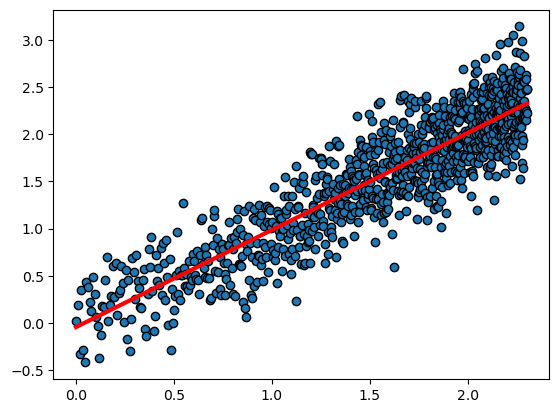

In [11]:
y_hat = model1.predict(x_transformed.values[:, None])

plt.scatter(x_transformed, y, ec='k')
plt.plot(x_transformed, y_hat, c='r', lw=3);

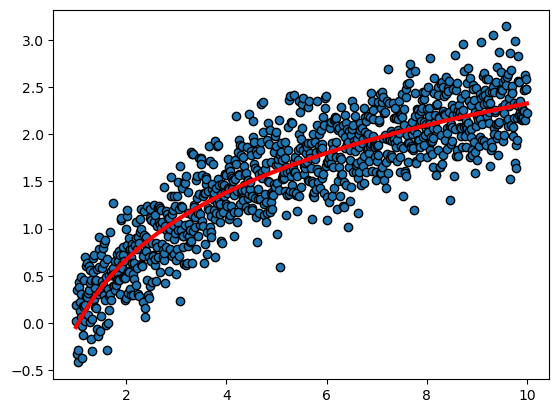

In [12]:
y_hat = model1.predict(x_transformed.values[:, None])

plt.scatter(x, y, ec='k')
plt.plot(x, y_hat, c='r', lw=3);

#### Fit Model & Evaluate

In [13]:
# Apply Transform
y_test_transformed = transform_func(y_test)

# Define, Fit & Validate Model
model2 = LinearRegression()
model2.fit(x.values[:, None], y_transformed)
model2.score(x_test.values[:, None], y_test_transformed)

0.7529510959788008

#### Plot Fit Line

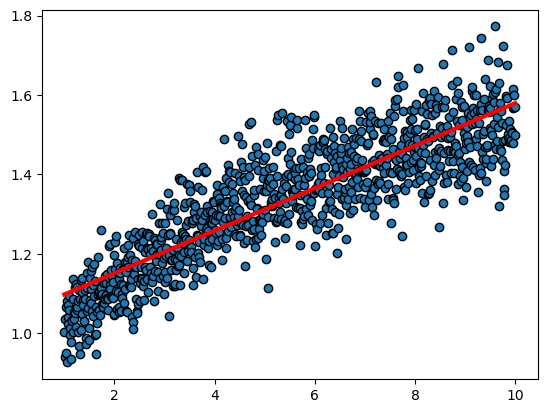

In [14]:
y_hat = model2.predict(x.values[:, None])

plt.scatter(x, y_transformed, ec='k')
plt.plot(x, y_hat, c='r', lw=3);